In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd
import math

In [159]:
def plotSingle(x,t,name=None, title=None):
    fig = plt.figure(figsize=(12, 3), dpi=80)
    plt.plot(t, x, color='b')
    if title:
        plt.title(title)
    else:
        plt.title('Periodic signal into a state space')
    plt.xlabel('time')
    plt.ylabel('x')
    plt.legend(('x', 'y'),loc='upper left')
    plt.savefig(name, format="png")
    plt.show()

In [146]:
def plotDelayed(x, b, name, step=0):
    a=530
    #b=1400
    x1 = x[a:b]
    x2 = x[a+step:b+step]
    fig = plt.figure(figsize=(8, 8), dpi=80)
    plt.plot(x1, x2,'-b')
    plt.title('Pedestrian flow, delay: '+str(step)+', No. points: '+ str(b))
    plt.xlabel('x')
    plt.ylabel('delayed x')
    plt.legend(('x', 'y'),loc='upper left')
    plt.savefig(name, format="png")
    plt.show()

In [3]:
data = pd.read_csv('MI_timesteps.txt', sep=" ")
data = data[1000:].copy()
npdata = data.to_numpy()

In [23]:
data.head(2)

,timeStep,areaDensityCounting-PID5,areaDensityCounting-PID6,areaDensityCounting-PID7,areaDensityCounting-PID8,areaDensityCounting-PID9,areaDensityCounting-PID10,areaDensityCounting-PID11,areaDensityCounting-PID12,areaDensityCounting-PID13
1000,1001,0,2,97,7,0,0,5,1,43
1001,1002,0,2,96,7,0,0,5,1,45


### Analysis of one component of data

In [115]:
time = npdata[:,0]
col1 = npdata[:,1]
col2 = npdata[:,2]
col3 = npdata[:,3]
col4 = npdata[:,4]

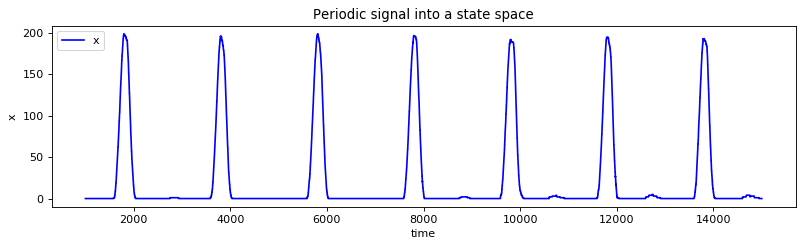

In [160]:
plotSingle(col1,time,name="task5_1.png")

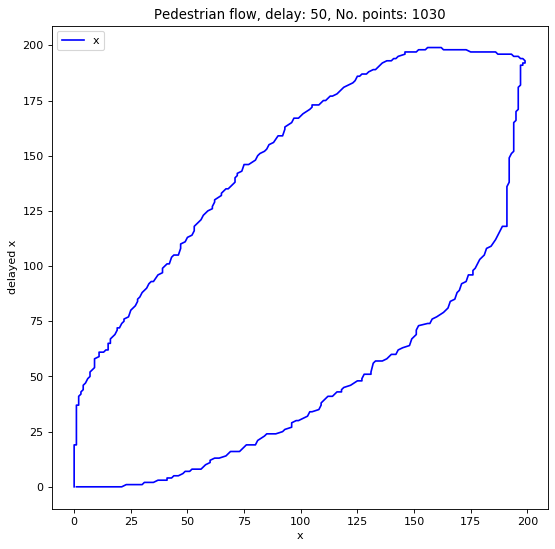

In [148]:
plotDelayed(col1, 1030,step=50,name="task5_2.png")

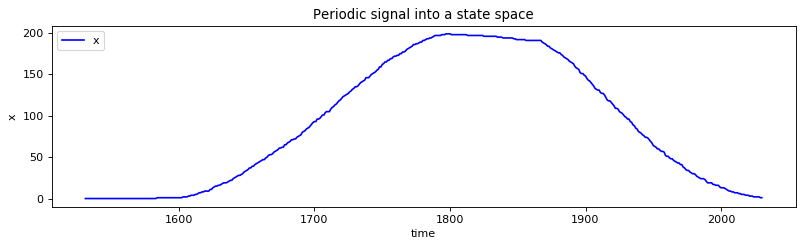

In [161]:
plotSingle(col1[530:1030],time[530:1030], name="task5_3.png")

### Delay Embeddings

In [150]:
def plotPedestrianX(x1,x2,name,title=None):
    fig = plt.figure(figsize=(8, 8), dpi=80)
    plt.plot(x1, x2,'-b')
    if title:
        plt.title(title)
    else:
        plt.title('Pedestrian flow')
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.legend(('x', 'y'),loc='upper left')
    plt.savefig(name, format="png")
    plt.show()

In [151]:
def plot_3D(x_t, title=None, name=None):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    colors = plt.cm.viridis(np.linspace(0, 1, 1))
    x = x_t[:,0]
    y = x_t[:,1]
    z = x_t[:,2]
    lines = ax.plot(x, y, z, '-', c=colors[0])
    plt.setp(lines, linewidth=2)
    if title:
        plt.title(title)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.savefig(name, format="png")
    plt.show()

In [152]:
def delay_array(x, step=3, n=2):
    del_lst = []
    for i in range(12000): 
        temp=[]
        for j in range(350):
            temp.append(x[i+j*step])
        del_lst.append(np.array(temp))   
    val = np.array(del_lst)
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(val)
        
    return principalComponents    

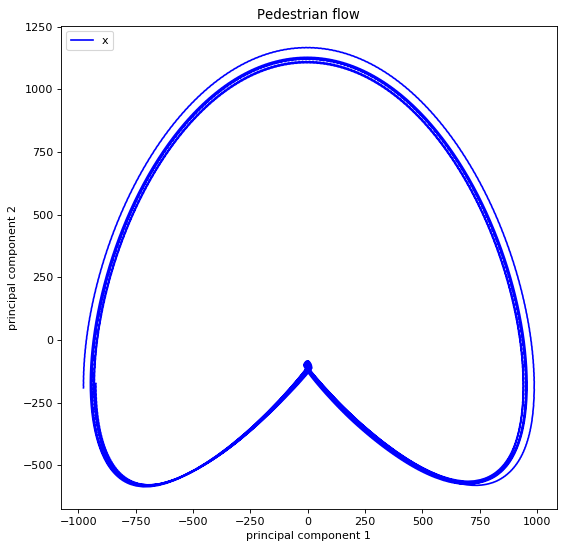

In [153]:
principalComponents = delay_array(col1, step=3, n=2)
plotPedestrianX(principalComponents[:,0],principalComponents[:,1], '5_part1_1.png')

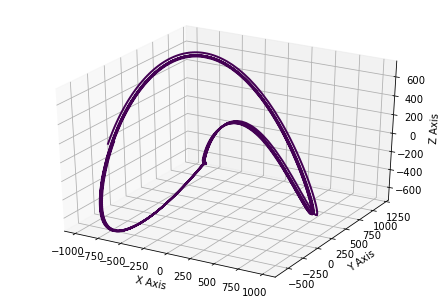

In [154]:
principalComponents1 = delay_array(col1, step=3, n=3)
plot_3D(principalComponents1, name='5_part1_12.png')

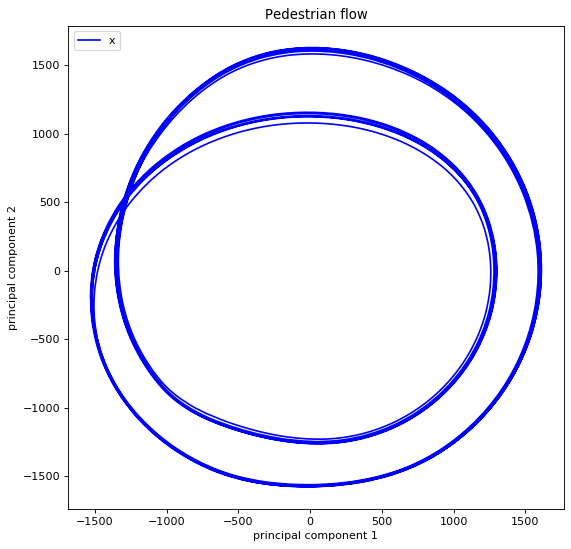

In [155]:
principalComponents2 = delay_array(col2, step=3, n=2)
plotPedestrianX(principalComponents2[:,0],principalComponents2[:,1], '5_part1_2.png')

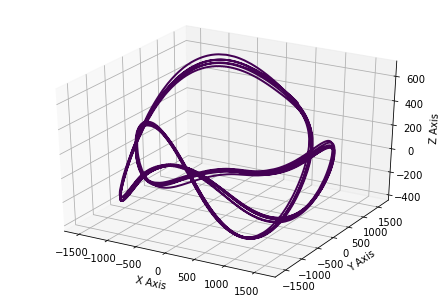

In [156]:
principalComponents21 = delay_array(col2, step=3, n=3)
plot_3D(principalComponents21,name='5_part1_21.png')

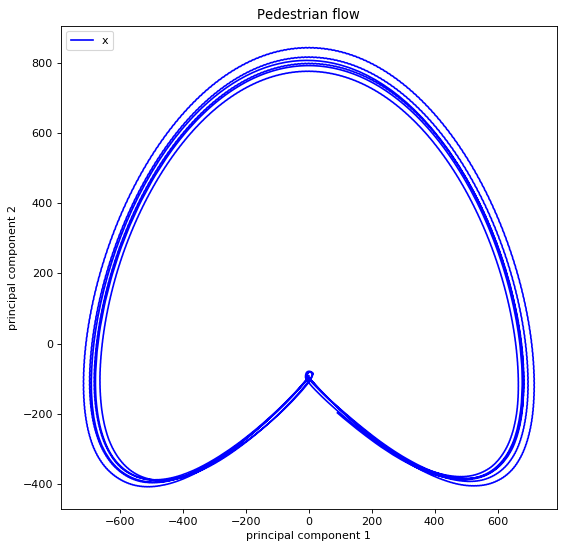

In [157]:
principalComponents3 = delay_array(col3, step=3, n=2)
plotPedestrianX(principalComponents3[:,0],principalComponents3[:,1], '5_part1_3.png')

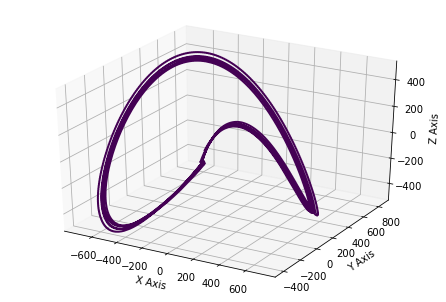

In [158]:
principalComponents31 = delay_array(col3, step=3, n=3)
plot_3D(principalComponents31,name='5_part1_31.png')